<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ADA.csv')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1822,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1823,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1824,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ADA-USD_ADJCLOSE  1629 non-null   float64
 2   ADA-USD_CLOSE     1629 non-null   float64
 3   ADA-USD_HIGH      1629 non-null   float64
 4   ADA-USD_LOW       1629 non-null   float64
 5   ADA-USD_OPEN      1629 non-null   float64
 6   ADA-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ADA-USD_ADJCLOSE,197
ADA-USD_CLOSE,197
ADA-USD_HIGH,197
ADA-USD_LOW,197
ADA-USD_OPEN,197
ADA-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADA-USD_ADJCLOSE,1629.0,4.955610e-01,6.687141e-01,2.396100e-02,5.498100e-02,1.198830e-01,9.174660e-01,2.968239e+00
ADA-USD_CLOSE,1629.0,4.955610e-01,6.687141e-01,2.396100e-02,5.498100e-02,1.198830e-01,9.174660e-01,2.968239e+00
ADA-USD_HIGH,1629.0,5.172446e-01,6.969798e-01,2.599300e-02,5.692600e-02,1.256630e-01,9.569040e-01,3.099186e+00
ADA-USD_LOW,1629.0,4.713412e-01,6.385373e-01,1.913000e-02,5.236800e-02,1.138860e-01,8.777360e-01,2.907606e+00
ADA-USD_OPEN,1629.0,4.950231e-01,6.686581e-01,2.395400e-02,5.422400e-02,1.193970e-01,9.175090e-01,2.966390e+00
ADA-USD_VOLUME,1629.0,1.204915e+09,2.182599e+09,2.930550e+06,6.533307e+07,1.959541e+08,1.385060e+09,1.914198e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
1218,2020-08-26,0.115285,0.115285,0.117807,0.111282,0.113347,3.147619e+08
1702,2021-12-23,1.474691,1.474691,1.489489,1.311121,1.328843,2.068524e+09
1003,2020-01-24,0.045004,0.045004,0.045243,0.041448,0.043380,7.750365e+07
564,2018-11-11,0.076481,0.076481,0.077373,0.074438,0.075165,2.366350e+07
1355,2021-01-10,0.304895,0.304895,0.340394,0.284556,0.332961,3.732911e+09
53,2017-06-18,NaN,NaN,NaN,NaN,NaN,NaN
1361,2021-01-16,0.352444,0.352444,0.365411,0.302250,0.302512,4.476162e+09
721,2019-04-17,0.083074,0.083074,0.084560,0.082078,0.083785,6.621075e+07
703,2019-03-30,0.071739,0.071739,0.073712,0.068405,0.071257,9.490767e+07
998,2020-01-19,0.041979,0.041979,0.045765,0.041412,0.044851,9.118716e+07


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,18716200.0,21.505011,40.206349
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6766780.0,18.806006,26.074639
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5532220.0,1.990010,15.476554
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7280250.0,14.609836,23.730689
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4419440.0,5.595160,11.938711


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

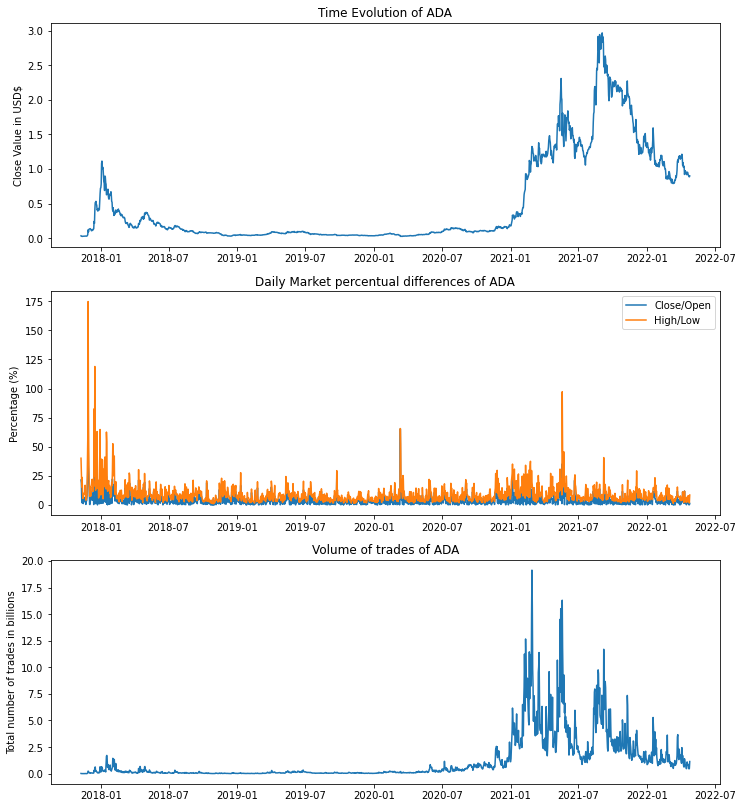

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1453,2021-11-01,1.950002,1.950002,2.015316,1.917960,1.964962,2.649339e+09,0.767181,5.076016
1454,2021-11-02,1.971377,1.971377,1.996540,1.934827,1.949818,2.459980e+09,1.093601,3.189587
1455,2021-11-03,2.063701,2.063701,2.144626,1.950845,1.971404,4.722706e+09,4.472400,9.933178
1456,2021-11-04,1.984882,1.984882,2.100966,1.956403,2.064559,3.301214e+09,4.014193,7.389222
1457,2021-11-05,1.986206,1.986206,2.018975,1.963668,1.984745,2.274852e+09,0.073559,2.816516
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08,2.943303,8.087861
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08,0.350655,3.329853
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08,2.102638,2.933783
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08,0.217639,1.814127


# BUILDING LSTM MODEL

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,1.984882,2.063701,1.971377,1.950002,1.986206,2021-11-05
1,1.986206,1.984882,2.063701,1.971377,2.006609,2021-11-06
2,2.006609,1.986206,1.984882,2.063701,2.021872,2021-11-07
3,2.021872,2.006609,1.986206,1.984882,2.124419,2021-11-08
4,2.124419,2.021872,2.006609,1.986206,2.273483,2021-11-09
...,...,...,...,...,...,...
167,0.937341,0.953333,0.936730,0.917466,0.910474,2022-04-21
168,0.910474,0.937341,0.953333,0.936730,0.907154,2022-04-22
169,0.907154,0.910474,0.937341,0.953333,0.888503,2022-04-23
170,0.888503,0.907154,0.910474,0.937341,0.886350,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((172,), (172, 4, 1), (172,))

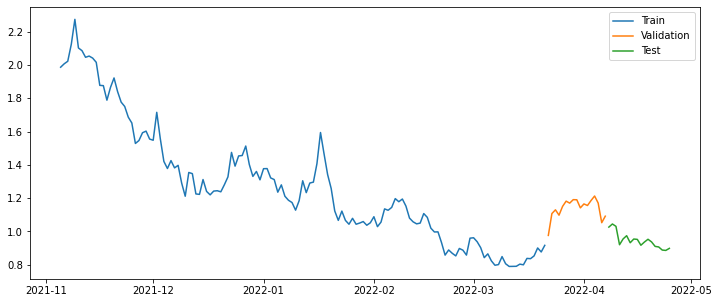

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.035),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 144ms/step - loss: 1.0101 - mean_absolute_error: 0.8900 - val_loss: 0.0515 - val_mean_absolute_error: 0.2217
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0758 - mean_absolute_error: 0.2404 - val_loss: 0.0640 - val_mean_absolute_error: 0.2478
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0569 - mean_absolute_error: 0.1901 - val_loss: 0.0105 - val_mean_absolute_error: 0.0892
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0264 - mean_absolute_error: 0.1334 - val_loss: 0.0068 - val_mean_absolute_error: 0.0646
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0171 - mean_absolute_error: 0.1054 - val_loss: 0.0247 - val_mean_absolute_error: 0.1438
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0796 - val_loss: 0.0221 - val_mean_absolute_error: 0.1339
Epoch 7/100
5/5 [==========

5/5 [==============================] - 0s 12ms/step - loss: 0.0079 - mean_absolute_error: 0.0680 - val_loss: 0.0053 - val_mean_absolute_error: 0.0566
Epoch 52/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0626 - val_loss: 0.0056 - val_mean_absolute_error: 0.0561
Epoch 53/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0073 - mean_absolute_error: 0.0640 - val_loss: 0.0045 - val_mean_absolute_error: 0.0475
Epoch 54/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0072 - mean_absolute_error: 0.0664 - val_loss: 0.0059 - val_mean_absolute_error: 0.0577
Epoch 55/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0728 - val_loss: 0.0113 - val_mean_absolute_error: 0.0913
Epoch 56/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0090 - mean_absolute_error: 0.0754 - val_loss: 0.0166 - val_mean_absolute_error: 0.1189
Epoch 57/100
5/5 [===================

In [20]:
#!pip install tensorflow

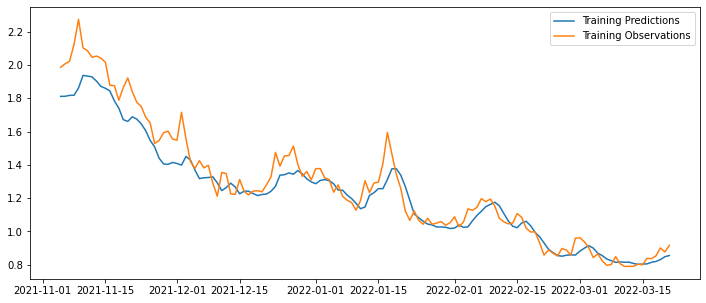

In [21]:
train_predictions = model.predict(X_train).flatten()

fig,axs = plt.subplots(1, 1, figsize=(12,5))

axs.plot(dates_train, train_predictions)
axs.plot(dates_train, y_train)
axs.legend(['Training Predictions', 'Training Observations'])

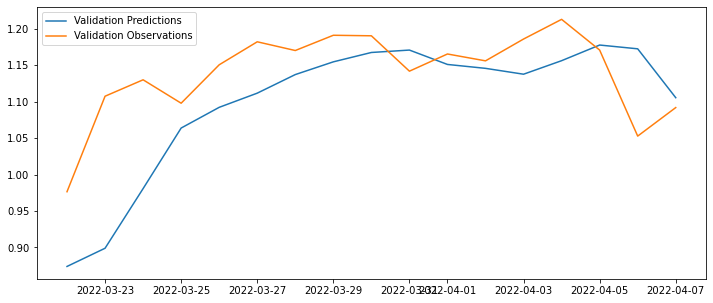

In [22]:
val_predictions = model.predict(X_val).flatten()


fig,axs = plt.subplots(1, 1, figsize=(12,5))

axs.plot(dates_val, val_predictions)
axs.plot(dates_val, y_val)
axs.legend(['Validation Predictions', 'Validation Observations'])

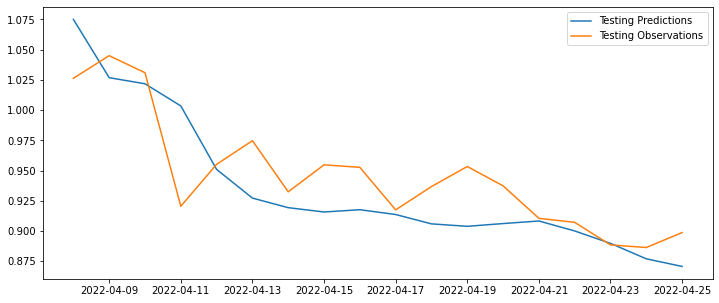

In [23]:
test_predictions = model.predict(X_test).flatten()

fig,axs = plt.subplots(1, 1, figsize=(12,5))

axs.plot(dates_test, test_predictions)
axs.plot(dates_test, y_test)
axs.legend(['Testing Predictions', 'Testing Observations'])

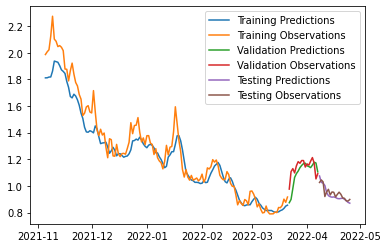

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [25]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])
print(last_window)
for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

[[0.877092]
 [0.901099]
 [0.853433]
 [0.836784]]


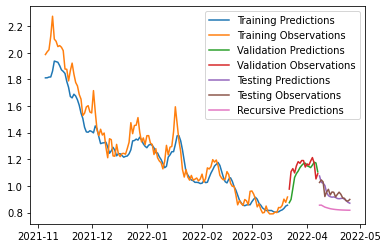

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

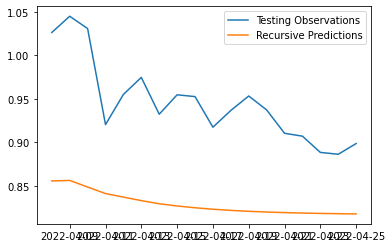

In [27]:
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Testing Observations',
            'Recursive Predictions'])

In [28]:
dates_test

array([Timestamp('2022-04-08 00:00:00'), Timestamp('2022-04-09 00:00:00'),
       Timestamp('2022-04-10 00:00:00'), Timestamp('2022-04-11 00:00:00'),
       Timestamp('2022-04-12 00:00:00'), Timestamp('2022-04-13 00:00:00'),
       Timestamp('2022-04-14 00:00:00'), Timestamp('2022-04-15 00:00:00'),
       Timestamp('2022-04-16 00:00:00'), Timestamp('2022-04-17 00:00:00'),
       Timestamp('2022-04-18 00:00:00'), Timestamp('2022-04-19 00:00:00'),
       Timestamp('2022-04-20 00:00:00'), Timestamp('2022-04-21 00:00:00'),
       Timestamp('2022-04-22 00:00:00'), Timestamp('2022-04-23 00:00:00'),
       Timestamp('2022-04-24 00:00:00'), Timestamp('2022-04-25 00:00:00')],
      dtype=object)